# Model improvement and selection


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>


# Generalizability of our models

We want to train models on known data in order to make inferences (predictions) on unknown data -> **supervised ML**

How do we know how good our models are? 

# Metrics for regression

MSE: Mean Squared Error

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - h(x_i))^2$$

MAE: Mean Absolute Error 

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - h(x_i)|$$

MAPE: Mean Absolute Percent Error

$$MAPE = \frac{1}{n} \sum_{i=1}^{n} \frac{|y_i - h(x_i)|}{y_i}$$

Explained Variance:


$$explained\_{}variance(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$$



Let's start with an example of simple linear regression. We will compute some metrics useful in regression problems and discuss them.

In [8]:
from sklearn import datasets
import pandas as pd

datasets.load_diabetes()
X = datasets.load_diabetes()['data']
y = datasets.load_diabetes()['target']
print(X.shape, y.shape)

df = pd.DataFrame(X, columns=["age","sex","bmi","bp", "tc", "ldl", "hdl","tch", "ltg", "glu"])

df['progression'] = datasets.load_diabetes()['target']

df.head()
#df.isnull().sum()

(442, 10) (442,)


age            0
sex            0
bmi            0
bp             0
tc             0
ldl            0
hdl            0
tch            0
ltg            0
glu            0
progression    0
dtype: int64

<AxesSubplot:>

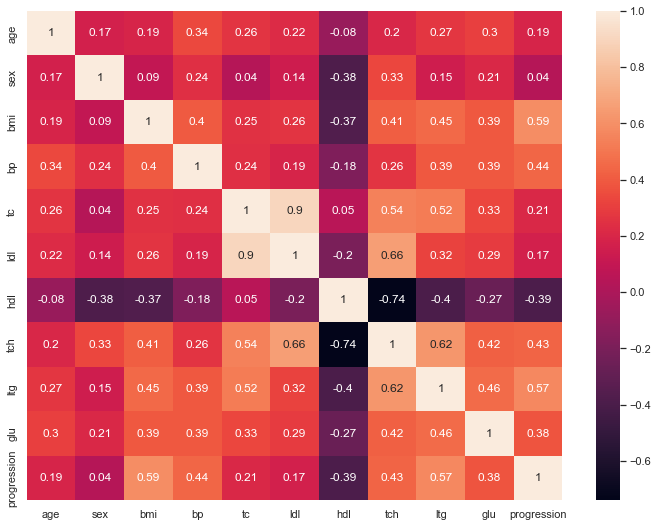

In [9]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)})
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Text(0, 0.5, 'PROGRESSION')

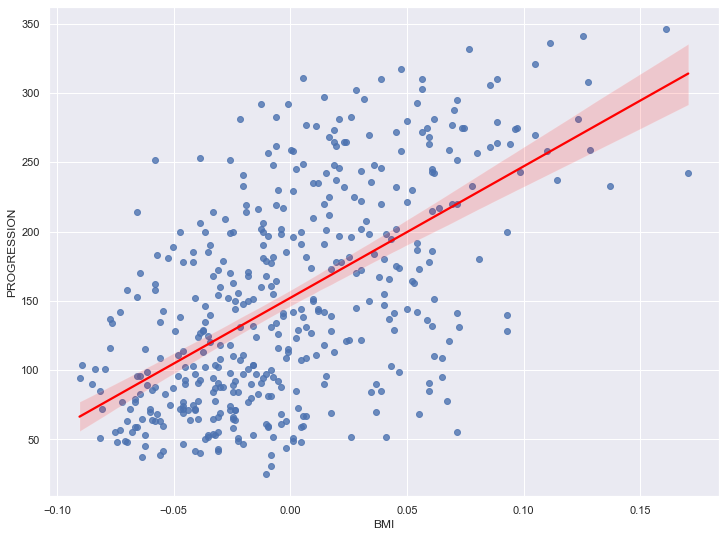

In [10]:
import matplotlib.pyplot as plt
sns.regplot(data=df, x='bmi', y='progression',line_kws={"color": "red"})
plt.xlabel('BMI')
plt.ylabel('PROGRESSION')

In [14]:
df.shape

(442, 11)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.iloc[:,:-1]

y = df['progression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

reg = LinearRegression().fit(X_train, y_train)

y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [22]:
print(f'the intercept is:{reg.intercept_: .2f}')

print(f'the slope is:{reg.coef_}')

print(f'Coeff. of determination on train set:{reg.score(X_train, y_train): .2f}') #train set
print(f'Coeff. of determination on test set:{reg.score(X_test, y_test): .2f}') #test set

the intercept is: 151.78
the slope is:[732.108884   562.22730578]
Coeff. of determination on train set: 0.46
Coeff. of determination on test set: 0.45


In [23]:
from sklearn import metrics
import numpy as np

print(f'The MAE is:{metrics.mean_absolute_error(y_test, y_test_pred): .2f}')
print(f'The RMSE is:{np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)): .2f}')
print(f'The MAPE is:{metrics.mean_absolute_percentage_error(y_test, y_test_pred): .2f}')
print(f'The Explained Variance is:{metrics.explained_variance_score(y_test, y_test_pred): .2f}')
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1) Where n is the sample size and p is the number of independent variables.

The MAE is: 43.99
The RMSE is: 53.87
The MAPE is: 0.39
The Explained Variance is: 0.45


https://scikit-learn.org/stable/datasets/toy_dataset.html

Functions ending with _score return a value to maximize, the higher the better.
Functions ending with _error or _loss return a value to minimize, the lower the better.

R Square/Adjusted R Square is better used to explain the model to other people because you can explain the number as a percentage of the output variability. MSE, RMSE, or MAE are better be used to compare performance between different regression models. It makes total sense to use MSE if the value is not too big and MAE if you do not want to penalize large prediction errors.
Adjusted R square is the only metric here that considers the overfitting problem, although very different R square values in the training and test dataset may be indicative of overfitting. 

### Exercice

Now try to train a simple regression model using the second most correlated variable with "progression". Compare the metrics obtained.

We will now train another type of model (third degree polynomial regression) and use the above metrics to compare the two.

In [38]:
from sklearn.preprocessing import PolynomialFeatures
#creating the 3rd degree polinomial
poly = PolynomialFeatures(degree=3, include_bias=True)
#transforming the values in all X
poly_features = poly.fit_transform(X)
#splitting
X_train3, X_test3, y_train3, y_test3 = train_test_split(poly_features,y, test_size=0.2,random_state=1)
#creating the polynomial regression
poly_reg = LinearRegression()
#fitting
poly_reg.fit(X_train3, y_train3)
#predictions
y_test3_pred = poly_reg.predict(X_test3)
y_train3_pred = poly_reg.predict(X_train3)

In [39]:
#R^2
#train set
print(f'Coeff. of determination on train set:{poly_reg.score(X_train3, y_train3): .2f}') 
#test set
print(f'Coeff. of determination on test set:{poly_reg.score(X_test3, y_test3): .2f}')

Coeff. of determination on train set:-0.32
Coeff. of determination on test set:-17.60


In [35]:
#model metrics
print(f'The MAE is:{metrics.mean_absolute_error(y_test3, y_test3_pred): .2f}')
print(f'The RMSE is:{np.sqrt(metrics.mean_squared_error(y_test3, y_test3_pred)): .2f}')
print(f'The MAPE is:{metrics.mean_absolute_percentage_error(y_test3, y_test3_pred): .2f}')
print(f'The Explained Variance is:{metrics.explained_variance_score(y_test3, y_test3_pred): .2f}')

The MAE is: 43.74
The RMSE is: 56.70
The MAPE is: 0.35
The Explained Variance is: 0.40


How can the coefficient of determination be greater than 1?

Is it a linear regression?

$$y_i=\beta_0+\beta_1 x_i+\beta_2 x_i^2+...+\beta_k x_i^k$$

it makes sense to use r-squared for a polynomial regression.


$$R^2 = 1-\dfrac{SSR}{SST}$$

$$SST = SSE + SSR$$

When SST is the total sum of squares, SSE is the explained sum of squares and SSR is the residual sum of squares.


Multiple lineal regression example

<AxesSubplot:xlabel='bmi', ylabel='progression'>

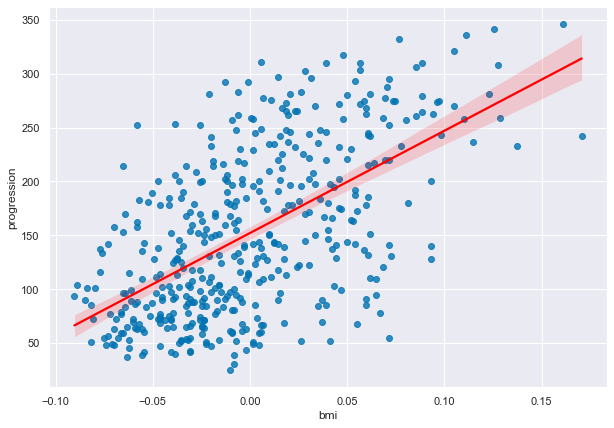

In [40]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

X = datasets.load_diabetes()['data']
y = datasets.load_diabetes()['target']
df = pd.DataFrame(X, columns=["age","sex","bmi","bp", "tc", "ldl", "hdl","tch", "ltg", "glu"])
df['progression'] = datasets.load_diabetes()['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

plt.figure(figsize=(10, 7))
sns.set_palette('colorblind')
#sns.pairplot(data=df[["age","bmi","bp","glu","tc","progression"]])
sns.regplot(data=df, x='bmi', y='progression',line_kws={"color": "red"})

In [41]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
lm = sm.OLS(y_train, X2)
lm2 = lm.fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     38.25
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           5.41e-50
Time:                        19:56:18   Log-Likelihood:                -1906.1
No. Observations:                 353   AIC:                             3834.
Df Residuals:                     342   BIC:                             3877.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.3457      2.902     52.155      0.0

### Exercice
Load the "Boston" dataset from the sklearn module.

Generate a dataframe containing the explanatory variables and the explained or "Target" variable, which will be MEDV.

Study the distribution of the response variable.

Study the relationship between the variables (it may be a good idea to calculate the correlation between them).

Choose the key explanatory variables.

Split the dataset into a training set and a test set.

Train a linear model using the chosen variables.

Evaluate the obtained model.



CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [43]:
#load dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()
dir(boston_dataset)
#dataframe (predictors+target)
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [46]:
#checking for null observations
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

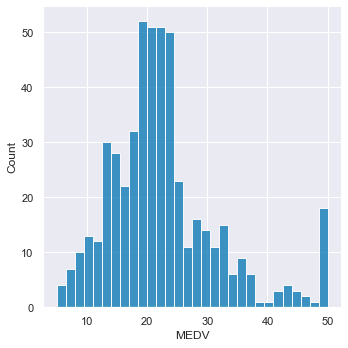

In [47]:
sns.displot(boston['MEDV'], bins=30)
plt.show()

<AxesSubplot:>

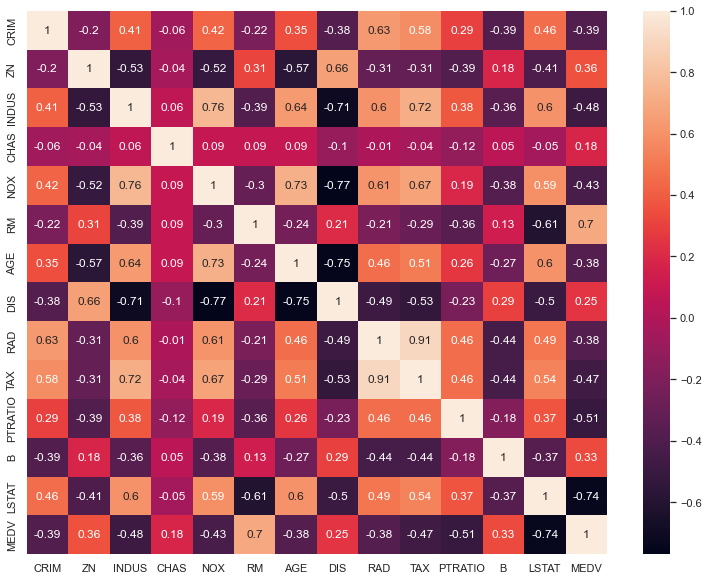

In [49]:
sns.set(rc={'figure.figsize':(13,10)})
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

When variables are correlated with one another is called muticollinearity. In this situation, the values of  regression coefficients are unstable, and the impact of individual features on a response variable are unclear. The prediction on a response variable is still reliable, but the interpretation of the model could be confused.

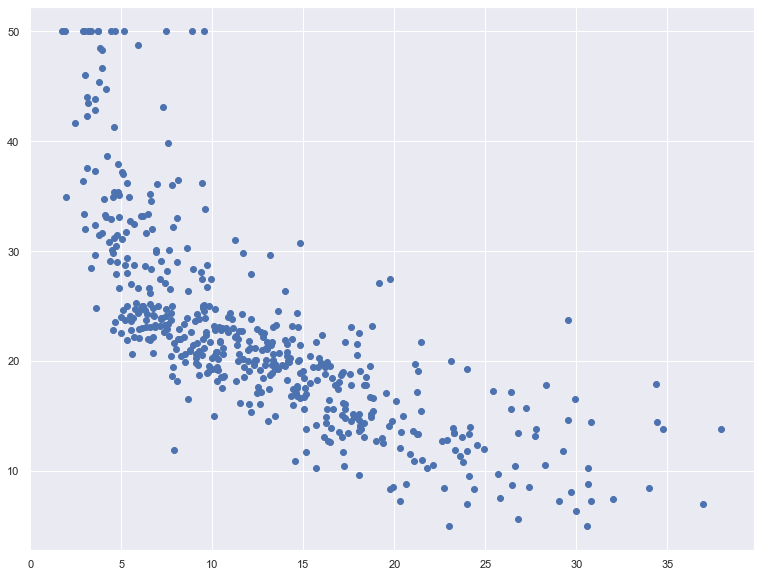

In [57]:
x = boston['LSTAT']
y = boston['MEDV']
plt.scatter(x, y)
#dependencia inversa

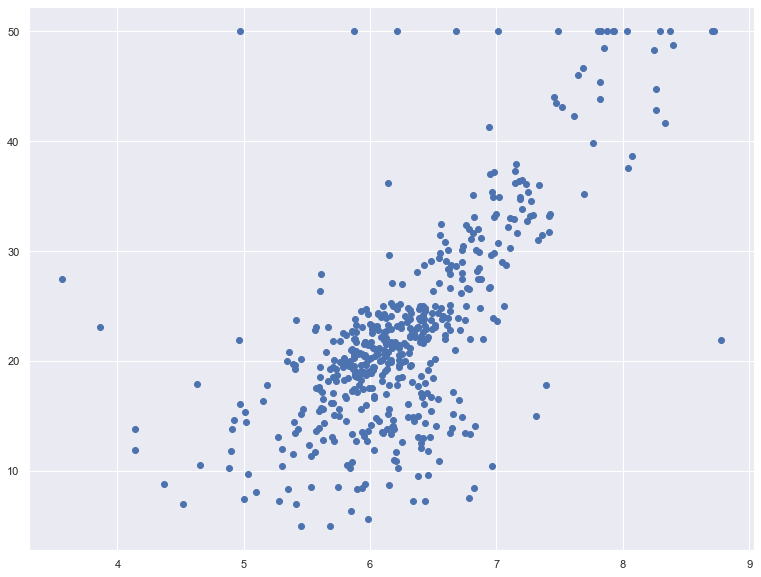

In [60]:
x = boston['RM']
y = boston['MEDV']
plt.scatter(x, y)

In [72]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

In [64]:
y = boston_df.iloc[:,-1]
X = boston_df[["LSTAT","RM"]]

NameError: name 'boston_df' is not defined

In [54]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

y_train_predict = lm.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print(rmse, r2)

y_test_predict = lm.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print(rmse, r2)

5.499676752139308 0.6332951960023749
5.6275074748675475 0.6506885971551086


### Exercice
Train a second degree polynomial model using the same variables as in the previous exercise and compare the performance of both models.
Which one is preferable?

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#creating the 2rd degree polinomial
poly = PolynomialFeatures(degree=2, include_bias=True, interaction_only=True)
#transforming the values in all X
poly_features = poly.fit_transform(X_train)
#creating the polynomial regression
poly_reg = LinearRegression()
#fitting
poly_reg.fit(X_train, y_train)
#predictions
y_test_pred = poly_reg.predict(X_test)
y_train_pred = poly_reg.predict(X_train)
#R^2
#train set
print(f'Coeff. of determination on train set:{poly_reg.score(X_train, y_train): .2f}') 
#test set
print(f'Coeff. of determination on test set:{poly_reg.score(X_test, y_test): .2f}')

Coeff. of determination on train set: 0.63
Coeff. of determination on test set: 0.65


# Metrics in classification

A first approximation could be the % of examples that we got right. This is called _accuracy_.

What if we had very few positive examples?

https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv

In [1]:
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier

pima = pd.read_csv('/Users/raulmarcosalonsogarcia/Desktop/pima-indians-diabetes.csv', header = None)
print(pima.head(5))

X = pima.iloc[:,:-1]
y = pima.iloc[:,-1]
print(np.mean(y == 1))

   0    1   2   3    4     5      6   7  8
0  6  148  72  35    0  33.6  0.627  50  1
1  1   85  66  29    0  26.6  0.351  31  0
2  8  183  64   0    0  23.3  0.672  32  1
3  1   89  66  23   94  28.1  0.167  21  0
4  0  137  40  35  168  43.1  2.288  33  1
0.3489583333333333


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [3]:
dummy_majority = DummyClassifier(strategy = 'most_frequent')
dummy_majority.fit(X_train, y_train)
y_pred_class = dummy_majority.predict(X_test)

In [4]:
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
print(cm)
print(precision_score(y_test, y_pred_class, average='binary'))

[[51 48]
 [35 20]]
0.29411764705882354


In [10]:
dummy_uniform = DummyClassifier(strategy = 'uniform')
dummy_uniform.fit(X_train, y_train)

y_pred_class = dummy_uniform.predict(X_test)
cm = confusion_matrix(y_test,y_pred_class)
print(cm)
print(precision_score(y_test, y_pred_class, average='binary'))
print(recall_score(y_test, y_pred_class, average='binary'))

[[49 50]
 [28 27]]
0.35064935064935066
0.4909090909090909


## The Confusion Matrix

![A confusion matrix](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)

from https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781838555078/6/ch06lvl1sec34/confusion-matrix

## Precision and recall

![Precision and recall](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)

Probably best to understand them as conditional probabilities:

Precision: What is the probability that an example is actually positive, given I've predicted it to be positive?

Recall: What is the probability of me calling an example positive, given it is actually positive?

from https://en.wikipedia.org/wiki/Precision_and_recall

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.64      0.49      0.56        99
           1       0.35      0.49      0.41        55

    accuracy                           0.49       154
   macro avg       0.49      0.49      0.48       154
weighted avg       0.53      0.49      0.50       154



## F1 measure

A good default choice because it combines both precission and recall:

$$ F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$


### $F_\beta$

F beta is a generalization of F1 that uses a (positive) weighting $\beta$ so that recall is considered $\beta$ times more important than precision.

$$ F_\beta = (1+\beta ^2) \cdot \frac{precision \cdot recall}{\beta ^2 \cdot precision + recall}$$

For example, if we are predicting the risk of a terrorist action, we value precision and recall differently.

In [14]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, y_pred_class, average = "binary", beta=2)

0.45454545454545453

## Precision-recall and ROC curves

In [15]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(solver='lbfgs', penalty='none', max_iter=2000)
logistic_regression.fit(X_train, y_train)

np.set_printoptions(suppress=True)
print('Intercept:   ',  logistic_regression.intercept_)
print('Coefficients:', logistic_regression.coef_)

Intercept:    [-9.03522945]
Coefficients: [[ 0.06460361  0.03410034 -0.01389726  0.00315703 -0.00181534  0.10263634
   0.69258965  0.03709449]]


In [16]:
train_acc = logistic_regression.score(X_train, y_train)
test_acc = logistic_regression.score(X_test, y_test)

print('Training Accuracy:', round(train_acc,4))
print('Testing Accuracy: ', round(test_acc,4))

Training Accuracy: 0.7704
Testing Accuracy:  0.7532


In [17]:
pred_test = logistic_regression.predict(X_test)
cm = confusion_matrix(y_test, pred_test)
print(cm)
print(classification_report(y_test, pred_test))

[[79 20]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



When the model classifies someone as non-diabetic, it will be correct 80% of the time.

When the model classifies someone as diabetic, it will be correct roughly 67% of the time.

The model will correctly classify 81% of non-diabetic individuals.

The model will correctly classify 65% of diabetic individuals.

Normally in logistic regression, if an observation is predicted to belong to the positive class at probability > 0.5, it is labeled as positive. However, we could really choose any probability threshold between 0 and 1. A precision-recall curve helps to visualize how the choice of threshold affects classifier performance, and can even help us select the best threshold for a specific problem.

In [19]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

plot_precision_recall_curve

<function sklearn.metrics._plot.precision_recall_curve.plot_precision_recall_curve(estimator, X, y, *, sample_weight=None, response_method='auto', name=None, ax=None, pos_label=None, **kwargs)>

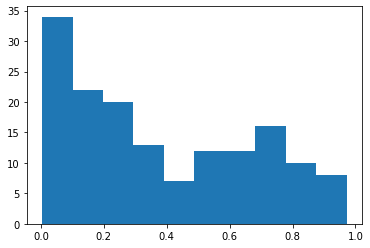

In [20]:
import matplotlib.pyplot as plt

probs_positive = logistic_regression.predict_proba(X_test)[:, 1]

plt.hist(probs_positive);

In [22]:
probs_positive
(probs_positive> .5).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [23]:
more_daring = (probs_positive > .1).astype(int)

precision_score(y_test, more_daring), recall_score(y_test, more_daring)

(0.45, 0.9818181818181818)

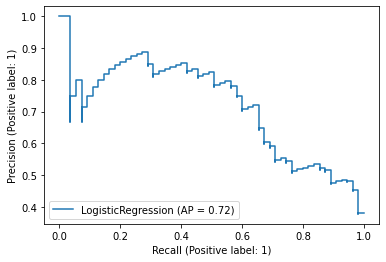

In [24]:
disp = plot_precision_recall_curve(logistic_regression, X_test, y_test)

AP summarizes a precision-recall curve as the weighted mean of precision achieved at each threshold, with the increase in recall from the previous threshold used as the weight. So, we can think of AP as a kind of weighted-average precision across all thresholds.

In a “baseline” classifier, the AUC-PR will depend on the fraction of observations belonging to the positive class. For example, in a balanced binary classification data set, the “baseline” classifier will have AUC-PR = 0.5. A classifier that provides some predictive value will fall between the “baseline” and perfect classifiers.

The precision-recall curve is used for evaluating the performance of binary classification algorithms. It is often used in situations where classes are heavily imbalanced.

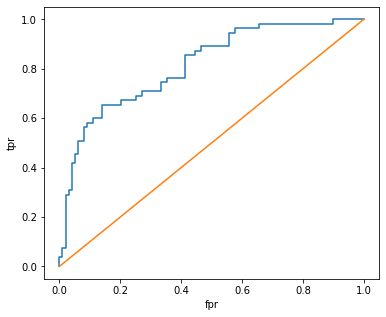

In [25]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, probs_positive)

plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0,1], [0, 1], color='tab:orange')
plt.gcf().set_size_inches(6,5)

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, probs_positive)

0.8143250688705234

In [27]:
thresholds

array([1.9715552 , 0.9715552 , 0.96804839, 0.95798818, 0.90174966,
       0.89548179, 0.78017244, 0.77586239, 0.77557327, 0.77513245,
       0.73443862, 0.73221897, 0.73046785, 0.72186826, 0.68893553,
       0.66846912, 0.65206402, 0.65123143, 0.64791017, 0.62322949,
       0.61376712, 0.58028788, 0.54494718, 0.50873397, 0.50762088,
       0.42595617, 0.4164991 , 0.41475237, 0.38766927, 0.33947408,
       0.32835116, 0.31053448, 0.30772954, 0.25968829, 0.23815942,
       0.22410524, 0.22256598, 0.21592905, 0.21008974, 0.1648608 ,
       0.14661277, 0.13765208, 0.13289127, 0.11274557, 0.11269989,
       0.04101649, 0.04015387, 0.00408689])

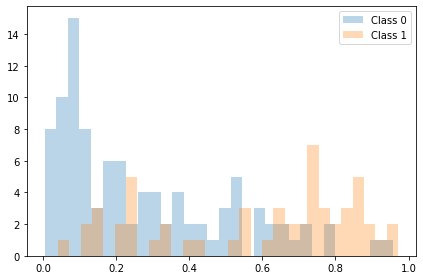

In [28]:
fig, ax = plt.subplots(1, 1)

ax.hist(probs_positive[y_test == 0], label='Class 0', alpha=.3, bins=30)

ax.hist(probs_positive[y_test == 1], label='Class 1', alpha=.3, bins=30)

ax.legend()

plt.tight_layout()

## Targeting metrics other than accuracy

[The scoring parameter: defining model evaluation rules](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)

When you are unsure of the best parameters, you can find the optimal ones by using the Hyperparameter Optimization  of a model. Provide a range of values and the trainer iterates various combinations of them to determine the combination of values that generates the best result.

In [30]:
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression(max_iter=10000, solver="liblinear")

parameter_grid = {'C': [0.01, 0.1, 1, 2, 10, 100], 'penalty': ['l1', 'l2']}

gridsearch = GridSearchCV(logistic_regression, parameter_grid)

gridsearch.fit(X_train, y_train)

gridsearch.best_params_



{'C': 1, 'penalty': 'l1'}

In order to prevent the magnitude of model weight values from becoming large, the idea of regularization is to penalize weight values by adding those weight values to the calculation of the error term. If weight values are included in the total error term that’s being minimized, then smaller weight values will generate smaller error values. L1 weight regularization penalizes weight values by adding the sum of their absolute values to the error term.

L2 weight regularization penalizes weight values by adding the sum of their squared values to the error term.

As it turns out, using L1 regularization can sometimes have a beneficial side effect of driving one or more weight values to 0, which effectively means the associated feature isn’t needed. L2 regularization limits model weight values, but usually doesn’t prune any weights entirely by setting them to 0.




#### Exercise

Return the logistic regression model coefficients for the optimal hyperparameters that we have found. Can you identify relevant independent variables in this dataset?

In [31]:
logistic_regression = LogisticRegression(solver='liblinear', penalty='l1', max_iter=10000, C=1)
logistic_regression.fit(X_train, y_train)

np.set_printoptions(suppress=True)
print('Intercept:   ',  logistic_regression.intercept_)
print('Coefficients:', logistic_regression.coef_)

Intercept:    [-8.3086239]
Coefficients: [[ 0.06379071  0.03227656 -0.01463973  0.00303554 -0.00161845  0.09407237
   0.54757316  0.03445706]]


0.37258347978910367
0.9762565403519899
0.9444444444444444 0.9577464788732394
[[ 4.13285551 -0.18650559 -0.4271808  -0.02431963 -0.40060139 -0.98338945
  -1.46761678 -0.78548763 -0.54646885]]


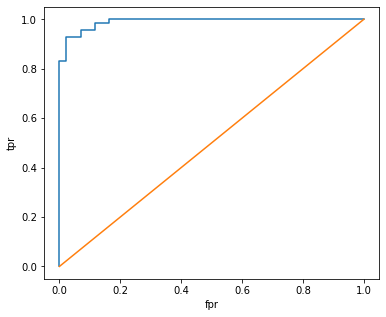

In [71]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

df=pd.DataFrame(load_breast_cancer().data,columns =[load_breast_cancer().feature_names])

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)
print(np.mean(y == 0))
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X_train[:,:9], y_train)
y_pred = clf.predict(X_test[:,:9])
print(roc_auc_score(y, clf.predict_proba(X[:,:9])[:, 1]))

probs_positive = clf.predict_proba(X_test[:,:9])[:, 1]
(probs_positive > .5).astype(int)


print(precision_score(y_test, y_pred), recall_score(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, probs_positive)

plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0,1], [0, 1], color='tab:orange')
plt.gcf().set_size_inches(6,5)

print(clf.coef_)

In [61]:
print(np.mean(y == 1))

0.6274165202108963


# The bias-variance tradeoff


Bias: systematic error: your model doesn't quite capture the shape of the underlying function, but this doesn't change with different subsets of the input data.

Variance: Your model changes a lot depending on the input data

![Bias and variance](figs/bias-variance.png)

from http://scott.fortmann-roe.com/docs/BiasVariance.html

How can we decompose these two terms in practice?


![Model complexity and generalizability](https://i.stack.imgur.com/GEJIM.png)

from http://scott.fortmann-roe.com/docs/BiasVariance.html

What we want is generally to go into the overfitting zone to make sure we are not leaving performance on the table and then tune back our model with some regularization technique.

## Train-validation-test split

![Train-validation-test split](https://upload.wikimedia.org/wikipedia/commons/b/bb/ML_dataset_training_validation_test_sets.png)


from https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets

## K-fold cross validation

![5-fold cross validation](https://www.mltut.com/wp-content/uploads/2020/05/cross-validation.png)

from https://www.mltut.com/k-fold-cross-validation-in-machine-learning-how-does-k-fold-work/

# K-fold Cross validation in sklearn


Training Dataset: The sample of data used to fit the model, the model "learns" from this data.

Validation Dataset: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters.

Test Dataset: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset. It is only used once a model is completely trained(using the train and validation sets).



Pros

* Estimation of variance of our model
* Better use of data

Cons

* Computational cost

In [ ]:
Decide: stratified k-fold? group k-fold?

In [ ]:
The Danger of Overfitting the Parameters and the Validation Set

Illustrate with a grid search -> leads to train/validation/test (p265)

(array([1., 0., 0., 0., 0., 0., 1., 0., 0., 2.]),
 array([0.74509804, 0.74851031, 0.75192259, 0.75533486, 0.75874714,
        0.76215941, 0.76557168, 0.76898396, 0.77239623, 0.77580851,
        0.77922078]),
 <BarContainer object of 10 artists>)

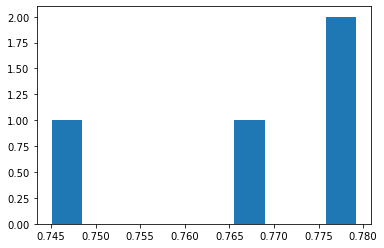

In [32]:
from sklearn.model_selection import cross_val_score

logr_results = cross_val_scoreb(logistic_regression, X_train, y_train, cv=4)

#np.mean(logr_results), np.std(logr_results)
plt.hist(logr_results)

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc_results = cross_val_score(rfc, X_train, y_train, cv=10)

np.mean(rfc_results), np.std(rfc_results), rfc_results

(0.7783976731887889,
 0.02529688733697794,
 array([0.77419355, 0.80645161, 0.80645161, 0.79032258, 0.7704918 ,
        0.75409836, 0.7704918 , 0.73770492, 0.81967213, 0.75409836]))

### Overfitting

![Under- and overfitting](https://djsaunde.files.wordpress.com/2017/07/bias-variance-tradeoff.png)

from https://djsaunde.wordpress.com/2017/07/17/the-bias-variance-tradeoff/

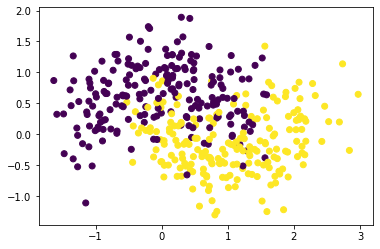

In [34]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(400, noise=.4, random_state=7)
plt.scatter(X[:, 0], X[:, 1], c=y)

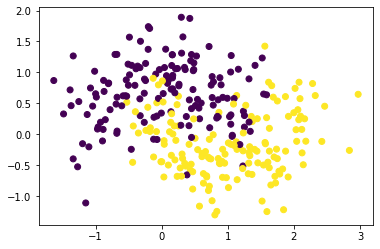

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

## Hyper parameter tuning

#### Exercise

Test whether increasing each of the following hyperparameters of a RandomForestClassifier increases or decreases variance. Before testing, write down your initial guess. Afterwards, compare it with your result.

```
n_estimators,
max_depth=None,
min_samples_split
```

+ n_estimators -> +-? variance
+ max_depth -> +-? variance
+ min_samples_split -> +-? variance

In [36]:
rfc = RandomForestClassifier(n_estimators=100)#default 5-folds

cross_val_score(rfc, X_train, y_train)

array([0.85      , 0.86666667, 0.9       , 0.85      , 0.83333333])

In [37]:
rfc = RandomForestClassifier(n_estimators=5)

cross_val_score(rfc, X_train, y_train)

array([0.9       , 0.86666667, 0.91666667, 0.83333333, 0.93333333])

In [38]:
rfc = RandomForestClassifier(n_estimators=500)

cross_val_score(rfc, X_train, y_train)

array([0.85      , 0.86666667, 0.9       , 0.83333333, 0.88333333])

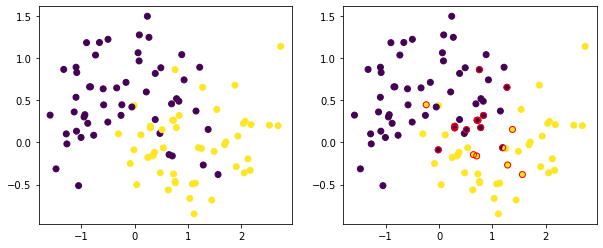

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
classifier = RandomForestClassifier(n_estimators=100)
predictions = classifier.fit(X_train, y_train).predict(X_test)
wrong = X_test[predictions != y_test]

f, ax = plt.subplots(1,2)
f.set_size_inches(10,4)
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test)
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=predictions)
ax[1].scatter(wrong[:, 0], wrong[:, 1], edgecolor='red', facecolor='none')

In [40]:
for value in [5, 25, 100, 200]:
    classifier = RandomForestClassifier(n_estimators=value)
    print(f'n_estimators: {value}')
    print(cross_val_score(classifier, X_train, y_train))

n_estimators: 5
[0.83333333 0.76666667 0.9        0.86666667 0.9       ]
n_estimators: 25
[0.88333333 0.86666667 0.9        0.81666667 0.88333333]
n_estimators: 100
[0.86666667 0.85       0.91666667 0.83333333 0.88333333]
n_estimators: 200
[0.86666667 0.88333333 0.9        0.83333333 0.86666667]


In [41]:
for value in [1, 2, 5, 10]:
    classifier = RandomForestClassifier(max_depth=value)
    print(f'max_depth: {value}')
    print(cross_val_score(classifier, X_train, y_train))

max_depth: 1
[0.85       0.68333333 0.8        0.85       0.8       ]
max_depth: 2
[0.88333333 0.83333333 0.86666667 0.86666667 0.85      ]
max_depth: 5
[0.91666667 0.85       0.88333333 0.86666667 0.88333333]
max_depth: 10
[0.88333333 0.86666667 0.9        0.85       0.88333333]


In [42]:
for value in [2, 5, 10, 25]:
    classifier = RandomForestClassifier(min_samples_split=value)
    print(f'min_samples_split: {value}')
    print(cross_val_score(classifier, X_train, y_train))

min_samples_split: 2
[0.86666667 0.86666667 0.9        0.83333333 0.86666667]
min_samples_split: 5
[0.88333333 0.85       0.9        0.86666667 0.86666667]
min_samples_split: 10
[0.91666667 0.85       0.88333333 0.85       0.86666667]
min_samples_split: 25
[0.9        0.83333333 0.88333333 0.86666667 0.86666667]


## Targeting metrics other than accuracy

[The scoring parameter: defining model evaluation rules](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)

## `sklearn` Pipelines for fun and profit

For:

1. Convenience

2. Joint parameter selection

In [43]:
# Without pipelines:
# Note that this doesn't actually make Machine Learning sense
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer

encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()
binarizer = LabelBinarizer()

X_train_1 = scaler.fit_transform(X_train)
X_train_2 = encoder.fit_transform(X_train_1)
predictions = classifier.fit(X_train_2, y_train)

classifier.predict(encoder.transform(scaler.transform(X_test)));

In [44]:
from sklearn.pipeline import Pipeline
import sklearn
sklearn.set_config(display='diagram')

pipeline = Pipeline(steps = [('scaler', StandardScaler()),
                             ('encoder', OneHotEncoder(handle_unknown='ignore')),
                             ('classifier', RandomForestClassifier())])

pipeline.fit(X_train, y_train)
pipeline.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [45]:
cross_val_score(pipeline, X, y, cv=5)

array([0.5, 0.5, 0.5, 0.5, 0.5])

In [46]:
from sklearn.neighbors import KNeighborsClassifier
new_pipe = Pipeline(steps=[
    ('preproc', StandardScaler()),
    ('classifier', KNeighborsClassifier())])

In [47]:
new_pipe.fit(X_train, y_train)
new_pipe.predict(X_test)

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0])

In [48]:
cross_val_score(new_pipe, X, y, cv=5)

array([0.875, 0.875, 0.8  , 0.9  , 0.85 ])

### And now the magic

https://scikit-learn.org/stable/modules/model_evaluation.html

CPU times: user 253 ms, sys: 27.3 ms, total: 280 ms
Wall time: 1.52 s


{'classifier__leaf_size': 5,
 'classifier__n_neighbors': 100,
 'preproc__with_std': False}

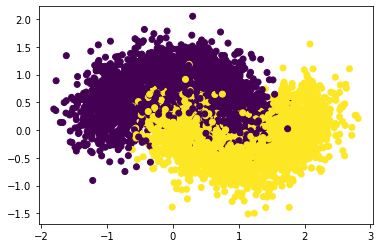

In [50]:
%%time

from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.datasets import make_moons

X, y = make_moons(5000, noise=.3, random_state=7)
plt.scatter(X[:, 0], X[:, 1], c=y)

grid_search = GridSearchCV(estimator=new_pipe,
                          param_grid={'preproc__with_std': [False, True],
                                      'classifier__n_neighbors': [5, 10, 100, 500],
                                      'classifier__leaf_size': [5, 10, 30, 100]},
                          cv=10, 
                          n_jobs=-1)

grid_search.fit(X, y)

grid_search.best_params_

In [51]:
grid_search.best_score_

0.916

In [52]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__leaf_size,param_classifier__n_neighbors,param_preproc__with_std,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003806,0.001392,0.016185,0.001976,5,5,False,"{'classifier__leaf_size': 5, 'classifier__n_ne...",0.930,0.914,...,0.910,0.910,0.898,0.922,0.892,0.902,0.906,0.9104,0.010984,25
1,0.004387,0.001275,0.013724,0.002834,5,5,True,"{'classifier__leaf_size': 5, 'classifier__n_ne...",0.934,0.912,...,0.902,0.902,0.912,0.924,0.906,0.904,0.902,0.9116,0.010307,21
2,0.002777,0.000688,0.016720,0.004920,5,10,False,"{'classifier__leaf_size': 5, 'classifier__n_ne...",0.936,0.908,...,0.902,0.922,0.908,0.916,0.896,0.910,0.904,0.9118,0.010787,17
3,0.003385,0.000626,0.016152,0.004103,5,10,True,"{'classifier__leaf_size': 5, 'classifier__n_ne...",0.934,0.914,...,0.900,0.920,0.906,0.922,0.906,0.912,0.908,0.9140,0.009381,9
4,0.003452,0.001202,0.025642,0.004874,5,100,False,"{'classifier__leaf_size': 5, 'classifier__n_ne...",0.936,0.922,...,0.904,0.922,0.906,0.916,0.908,0.916,0.910,0.9160,0.009121,1
5,0.004120,0.001112,0.028172,0.006751,5,100,True,"{'classifier__leaf_size': 5, 'classifier__n_ne...",0.938,0.916,...,0.900,0.924,0.904,0.914,0.906,0.914,0.912,0.9152,0.010628,5
6,0.003693,0.001172,0.074598,0.012520,5,500,False,"{'classifier__leaf_size': 5, 'classifier__n_ne...",0.932,0.914,...,0.896,0.922,0.908,0.912,0.900,0.912,0.904,0.9124,0.010613,13
7,0.003346,0.001142,0.071259,0.011068,5,500,True,"{'classifier__leaf_size': 5, 'classifier__n_ne...",0.930,0.908,...,0.894,0.920,0.908,0.906,0.896,0.914,0.904,0.9096,0.010307,29
8,0.002567,0.000630,0.014793,0.004991,10,5,False,"{'classifier__leaf_size': 10, 'classifier__n_n...",0.930,0.914,...,0.910,0.910,0.898,0.922,0.892,0.902,0.906,0.9104,0.010984,25
9,0.004228,0.001847,0.018848,0.005699,10,5,True,"{'classifier__leaf_size': 10, 'classifier__n_n...",0.934,0.912,...,0.902,0.902,0.912,0.924,0.906,0.904,0.902,0.9116,0.010307,21


In [53]:
grid_search.best_estimator_

Pipeline(steps=[('preproc', StandardScaler(with_std=False)),
                ('classifier',
                 KNeighborsClassifier(leaf_size=5, n_neighbors=100))])

# Additional References


[An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)

[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)

[scikit-learn cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)

[Regression metrics in sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

[A Simple Guide to Scikit-learn Pipelines](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf)

[scikit-learn for developers](https://scikit-learn.org/stable/developers/develop.html)

[Creating your own estimator in scikit-learn](http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/)